In [90]:
#Customer Churn Prediction Using Artificial Neural Network,to measure why customers are leaving a business.
#Bank Turnover Dataset
#Predict if bank customers will turnover next cycle?
#dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

In [91]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [92]:
#Load the data
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7077,7078,15725776,Lazar,649,Germany,Male,24,7,101195.23,1,0,0,133091.32,0
6461,6462,15666975,Sparks,710,France,Female,36,4,116085.06,1,1,0,58601.61,0
2559,2560,15650670,Bateson,567,Germany,Female,40,2,105222.86,2,1,0,93795.86,0
4767,4768,15688876,Wan,685,Spain,Male,39,9,0.00,2,1,1,18826.06,0
4643,4644,15672594,Stevenson,597,France,Female,60,0,131778.08,1,0,0,10703.53,1


In [93]:
#First of all, drop RowNumber, CustomerId, Surname column as it is of no use
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

In [94]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2278,473,France,Female,33,5,125827.43,1,0,1,145698.73,0
3024,648,Germany,Male,41,5,123049.21,1,0,1,5066.76,0
3986,706,Spain,Male,38,8,0.00,2,0,1,46635.11,0
581,607,Spain,Female,33,2,108431.87,2,0,1,109291.39,1
1248,689,Spain,Female,28,3,0.00,2,1,1,192449.02,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [96]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

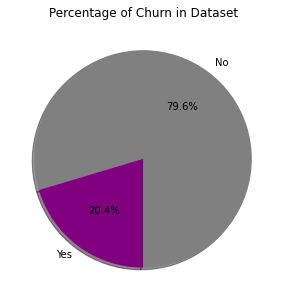

In [97]:
#Exploratory Data Analysis
sizes = df['Exited'].value_counts(sort = True)
colors = ["grey","purple"] 
plt.rcParams['figure.figsize'] = 5,5# Plot
plt.pie(sizes, explode=None, labels=['No','Yes'], colors=colors,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

In [98]:
# number null values in the table
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [99]:
df.shape

(10000, 11)

In [100]:
df[df.Exited==0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


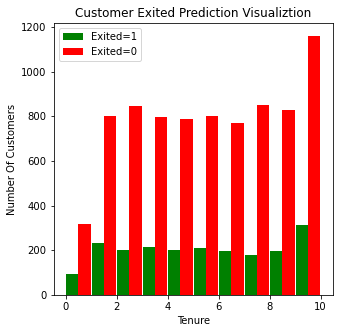

In [101]:
#Data Visualization

Tenure_exited_no = df[df.Exited==0].Tenure
Tenure_exited_yes = df[df.Exited==1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")

plt.hist([Tenure_exited_yes, Tenure_exited_no], rwidth=0.95, color=['green','red'],label=['Exited=1','Exited=0'])
plt.legend()

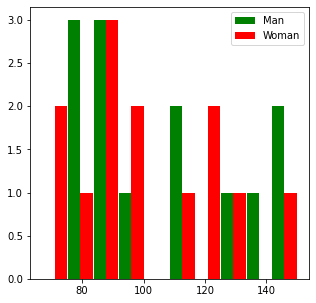

In [102]:
blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]
plt.hist([blood_sugar_men, blood_sugar_women], rwidth=0.95, color=['green','red'],label=['Man','Woman'])
plt.legend()

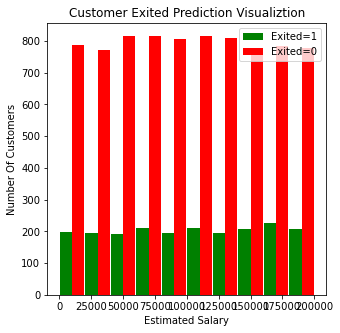

In [103]:
es_exited_no = df[df.Exited==0].EstimatedSalary     
es_exited_yes = df[df.Exited==1].EstimatedSalary      

plt.xlabel("Estimated Salary")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([es_exited_yes, es_exited_no], rwidth=0.95, color=['green','red'],label=['Exited=1','Exited=0'])
plt.legend()

In [104]:
#Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [105]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [106]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [107]:
df.Gender.unique()

array([1, 0], dtype=int64)

In [108]:
#One hot encoding for categorical columns, more than two feature. Label enconding used for a column which contain two freatuers only.

#when there is only value 0,1 in any column model will not make any comparision of values in the column instead it will assume that
#the particular feature is present(1)/ feature is absent(0)

#there are two type of Categorical Variables, 
#1)Nominal: no order relationship -> eg: male/female, states, colours, places
#2)Ordinal: numarical order between them -> eg: 
#degrees: graduate, master, PhD
#rating: satisfies, neutral, disatisfies
#high, low, medium

df2 = pd.get_dummies(data=df, columns=['Geography'])
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [109]:
df2.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9132,635,1,33,5,0.00,2,1,0,122949.71,0,1,0,0
514,605,1,51,3,136188.78,1,1,1,67110.59,1,1,0,0
1845,737,0,36,9,0.00,1,0,1,188670.90,1,1,0,0
9354,590,0,43,8,0.00,2,1,1,143628.31,0,1,0,0
3560,817,0,44,8,0.00,1,0,0,65501.91,1,1,0,0


In [110]:
df2.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [111]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [112]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [113]:
#Train test split

X = df2.drop('Exited',axis='columns')
y = df2['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [114]:
X_train.shape

(8000, 12)

In [115]:
X_test.shape

(2000, 12)

In [116]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.752,0,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.846,1,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.402,0,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0
7487,0.602,1,0.513514,0.4,0.000000,0.000000,0,0,0.421898,1,0,0
7542,0.314,1,0.216216,0.4,0.000000,0.333333,1,1,0.303413,0,0,1
7524,0.620,1,0.297297,0.8,0.666330,0.000000,1,1,0.925815,1,0,0
9412,0.750,0,0.108108,0.6,0.393324,0.000000,0,0,0.668609,1,0,0
6377,0.684,0,0.202703,0.9,0.000000,0.000000,1,0,0.567526,1,0,0


In [117]:
len(X_train.columns)

12

In [121]:
#Build a model (ANN) in tensorflow/keras

import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid') #'softmax' activation used for all clasification except binary clasification, 
    #'sigmoid' used for biary classification only
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy', #'categorical crossentropy' for 'softmax' activation
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5435 - accuracy: 0.7365
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.7960
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4613 - accuracy: 0.7962
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.8008
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4374 - accuracy: 0.8079
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.8133
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.8159
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8200
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4043 - accuracy: 0.8254
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8325

In [122]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3868 - accuracy: 0.8345


[0.3868434429168701, 0.8345000147819519]

In [123]:
yp = model.predict(X_test)
yp[:10]

array([[0.09659839],
       [0.05135074],
       [0.08099985],
       [0.06596377],
       [0.10629612],
       [0.22983703],
       [0.02713031],
       [0.1928488 ],
       [0.04169959],
       [0.3423025 ]], dtype=float32)

In [124]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [125]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [126]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [127]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1595
           1       0.76      0.27      0.40       405

    accuracy                           0.83      2000
   macro avg       0.80      0.62      0.65      2000
weighted avg       0.82      0.83      0.80      2000



Text(69.0, 0.5, 'Truth')

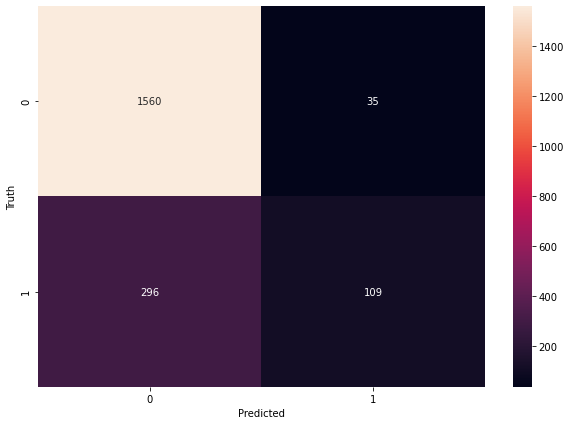

In [128]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [129]:
#The confusion matrix for the model test prediction results is shown below
conf=pd.DataFrame(confusion_matrix(y_test,y_pred))
conf.index=['Actual_0','Actual_1']
conf.columns=['Predicted_0','Predicted_1']
conf

,Predicted_0,Predicted_1
Actual_0,1560,35
Actual_1,296,109
